In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ws
import scipy.integrate as integrate

Seja $f(x)$ uma função definida em na reta de período $L$.

Os coeficientes de Fourier de $f$ são dados por
$$ \hat{f}(n) = \frac{1}{L} \int_0^L f(x) \, e^{-2 \pi i n x / L} \, dx \quad \text{para } n \in \mathbb{Z} $$

Escrevemos
$$ f(x) \sim \sum_{n \in \mathbb{Z}} a_n \, e^{2\pi i n x / L} $$
para indicar a série de Fourier associada a $f$.

É claro que os coeficientes assim definidos são números complexos. Usando o fato de que $f$ assume apenas valores reais, podemos derivar a seguinte forma equivalente:
$$ f(x) \sim \frac{a_0}{2} + \sum_{n = 1}^{\infty} \left[ a_n \cos(2\pi k x / L) + b_n \sin(2\pi k x / L) \right] $$

onde 
$$ 
    a_n = \frac{2}{L} \int_0^L f(x) \cos(2\pi k x / L) \, dx \\
    b_n = \frac{2}{L} \int_0^L f(x) \sin(2\pi k x / L) \, dx
$$

In [2]:
PI = np.pi

def sin(x, k, phi=0): return np.sin(2*PI*(k*x + phi))

def cos(x, k, phi=0): return np.cos(2*PI*(k*x + phi))

### Senoidais interativas

In [3]:
X = np.linspace(0, 5, 200)

k_slider = ws.FloatSlider(min=0.2, max=5, description="k")

phi_slider = ws.FloatSlider(min=0, max=2, description="phi")

@ws.interact(k=k_slider, phi=phi_slider, y0=2)
def plotfun(k, phi):
    Y = sin(X, k, phi)

    plt.subplots(figsize=(12, 3))
    plt.plot(X, Y, '-')
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=0.2, description='k', max=5.0, min=0.2), FloatSlider(value=0.0, descri…

### Cálculo dos coeficientes de Fourier

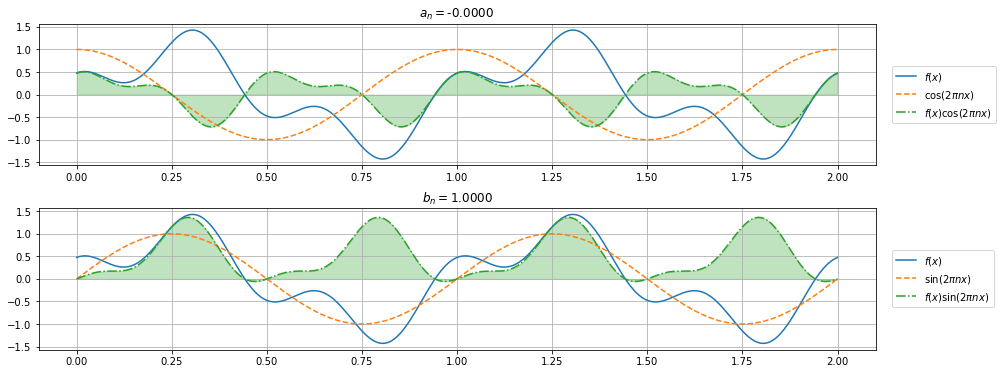

In [4]:
f = lambda x: sin(x, 1) + 0.5*sin(x, 3, 0.3)

# Período da função f
L = 1

# Índice dos coeficientes de Fourier a serem calculados
n = 1

show_product = True

fix, axs = plt.subplots(2, 1, figsize=(15, 6))

X = np.linspace(0, 2*L, 500)

ax = axs[0]
g = lambda x: cos(x/L, n)
h = lambda x: g(x) * f(x)

a_n = integrate.quad(h, a=0, b=L)[0] * 2/L

ax.plot(X, f(X), linestyle='-', label="$f(x)$")
ax.plot(X, g(X), linestyle='--', label=f"$\cos(2\pi nx)$")

if show_product:
    ax.plot(X, h(X), linestyle='-.', color='C02', label=f"$f(x)\cos(2\pi nx)$")
    ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)

ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
ax.set_title(f'$a_n = ${a_n:.4f}')
ax.grid()

ax = axs[1]
g = lambda x: sin(x/L, n)
h = lambda x: g(x) * f(x)

b_n = integrate.quad(h, a=0, b=L)[0] * 2/L

ax.plot(X, f(X), linestyle='-', label="$f(x)$")
ax.plot(X, g(X), linestyle='--', label=f"$\sin(2\pi nx)$")

if show_product:
    ax.plot(X, h(X), linestyle='-.', color='C02', label=f"$f(x)\sin(2\pi nx)$")
    ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)

ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
ax.set_title(f'$b_n = ${b_n:.4f}')
ax.grid()

plt.subplots_adjust(hspace=0.3)
plt.show()

## Calculando coeficientes de Fourier

In [5]:
def fourier_coef(f, n, xi, xf):
    L = xf - xi
    a_n = integrate.quad(lambda x: f(x)*cos(x/L, n), a=xi, b=xf)[0] * 2/L
    b_n = integrate.quad(lambda x: f(x)*sin(x/L, n), a=xi, b=xf)[0] * 2/L
    return a_n, b_n


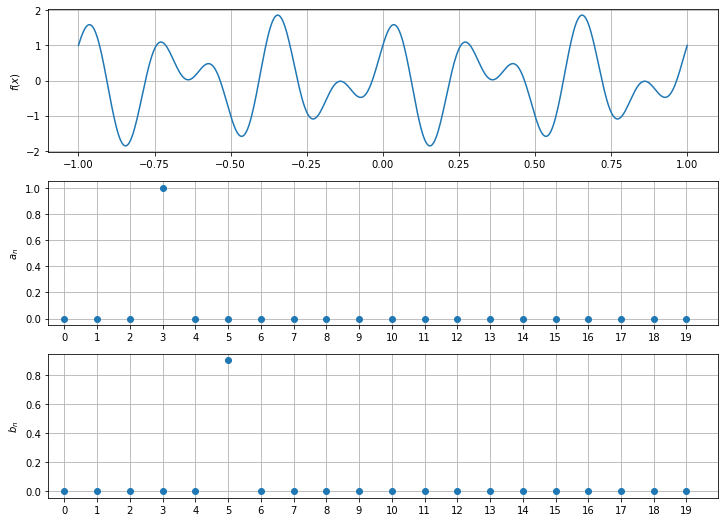

In [6]:
X = np.linspace(-1, 1, 500)
N = list(range(20))

f = lambda x: cos(x, 3) + 0.9*sin(x, 5)

L = 1

FN = [fourier_coef(f, n, 0, L) for n in N]

cos_coefs, sin_coefs  = zip(*FN)

fig, axs = plt.subplots(3, 1, figsize=(12, 9))

ax = axs[0]
ax.plot(X, f(X), '-')
ax.set_ylabel('$f(x)$')
ax.grid()

ax = axs[1]
ax.plot(N, cos_coefs, 'o')
ax.set_ylabel('$a_n$')
ax.set_xticks(N)
ax.set_xlim(left=-0.5)
ax.grid()

ax = axs[2]
ax.plot(N, sin_coefs, 'o')
ax.set_ylabel('$b_n$')
ax.set_xticks(N)
ax.set_xlim(left=-0.5)
ax.grid()

plt.show()

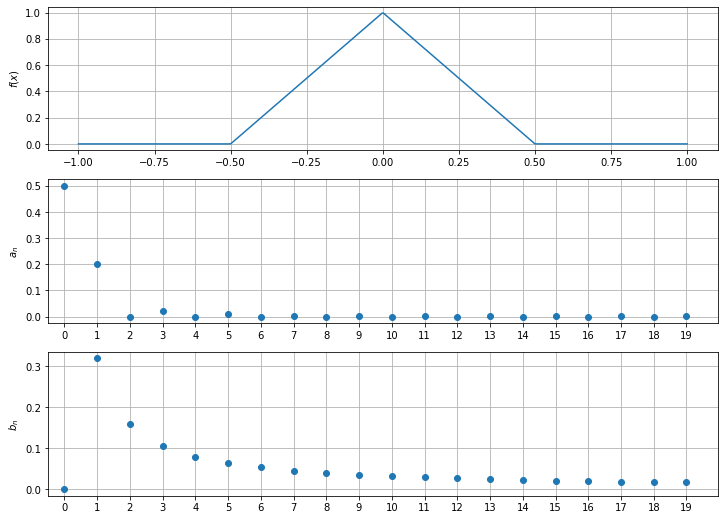

In [7]:
X = np.linspace(-1, 1, 500)
N = list(range(20))

def triangle(x):
    if x < -0.5 or x > 0.5:
        return 0
    elif x < 0:
        return 2*x + 1
    else:
        return -2*x + 1

f = np.vectorize(triangle, otypes=['float'])

L = 1

FN = [fourier_coef(f, n, 0, L) for n in N]

cos_coefs, sin_coefs  = zip(*FN)

fig, axs = plt.subplots(3, 1, figsize=(12, 9))

ax = axs[0]
ax.plot(X, f(X), '-')
ax.set_ylabel('$f(x)$')
ax.grid()

ax = axs[1]
ax.plot(N, cos_coefs, 'o')
ax.set_ylabel('$a_n$')
ax.set_xticks(N)
ax.set_xlim(left=-0.5)
ax.grid()

ax = axs[2]
ax.plot(N, sin_coefs, 'o')
ax.set_ylabel('$b_n$')
ax.set_xticks(N)
ax.set_xlim(left=-0.5)
ax.grid()

plt.show()

In [8]:
X = np.linspace(-1, 1, 500)
N = list(range(20))

def bump(x):
    if not (-1 < x < 1):
        return 0
    
    return np.exp(-1/(1-x**2))

@ws.interact(a = ws.FloatSlider(min=0.1, max=1, step=0.05, description="a"))
def interactive_bump_coefs(a):
    f = np.vectorize(lambda x: bump(x/a), otypes=['float'])

    L = 1

    FN = [fourier_coef(f, n, 0, L) for n in N]

    cos_coefs, sin_coefs  = zip(*FN)

    fig, axs = plt.subplots(3, 1, figsize=(12, 9))

    ax = axs[0]
    ax.plot(X, f(X), '-')
    ax.set_ylabel('$f(x)$')
    ax.grid()

    ax = axs[1]
    ax.plot(N, cos_coefs, 'o')
    ax.set_ylabel('$a_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.grid()

    ax = axs[2]
    ax.plot(N, sin_coefs, 'o')
    ax.set_ylabel('$b_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.grid()

    plt.show()

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, min=0.1, step=0.05), Output()), _dom_cl…

In [9]:
X = np.linspace(-1, 1, 500)
N = list(range(20))


@ws.interact(a = ws.FloatSlider(min=0.1, max=0.32, step=0.02, description="a"))
def interactive_gaussian_coefs(a):
    f = np.vectorize(lambda x: np.exp(-(x/a)**2), otypes=['float'])

    L = 1

    FN = [fourier_coef(f, n, 0, L) for n in N]

    cos_coefs, sin_coefs  = zip(*FN)

    fig, axs = plt.subplots(3, 1, figsize=(12, 9))

    ax = axs[0]
    ax.plot(X, f(X), '-')
    ax.set_ylabel('$f(x)$')
    ax.grid()

    ax = axs[1]
    ax.plot(N, cos_coefs, 'o')
    ax.set_ylabel('$a_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.grid()

    ax = axs[2]
    ax.plot(N, sin_coefs, 'o')
    ax.set_ylabel('$b_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.grid()

    plt.show()

interactive(children=(FloatSlider(value=0.1, description='a', max=0.32, min=0.1, step=0.02), Output()), _dom_c…

In [10]:
X = np.linspace(-1, 1, 500)
N = list(range(20))

@ws.interact(a = ws.FloatSlider(min=0.1, max=0.4, step=0.025, description="a"))
def interactive_gaussian_coefs(a):
    
    g = np.vectorize(lambda x: np.exp(-(x/a)**2), otypes=['float'])

    # f = lambda x: cos(x, 2) + 0.9*sin(x, 10)
    f = lambda x: cos(x, 3) + 0.9*sin(x, 7)

    h = lambda x: f(x) * g(x)

    L = 1

    FN = [fourier_coef(h, n, 0, L) for n in N]

    cos_coefs, sin_coefs  = zip(*FN)

    fig, axs = plt.subplots(3, 1, figsize=(12, 9))

    ax = axs[0]
    ax.plot(X, h(X), '-')
    ax.plot(X, f(X), linestyle='--', linewidth=0.9)
    ax.plot(X, g(X), linestyle='--', linewidth=0.9)
    ax.set_ylabel('$f(x)$')
    ax.grid()

    ax = axs[1]
    # ax.plot(N, cos_coefs, 'o')
    ax.stem(N, cos_coefs, basefmt='C0')
    ax.set_ylabel('$a_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.set_ylim(bottom=-0.25, top=0.5)
    ax.grid()

    ax = axs[2]
    # ax.plot(N, sin_coefs, 'o')
    ax.stem(N, sin_coefs, basefmt='C0')
    ax.set_ylabel('$b_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.set_ylim(bottom=-0.25, top=0.5)
    ax.grid()

    plt.show()

interactive(children=(FloatSlider(value=0.1, description='a', max=0.4, min=0.1, step=0.025), Output()), _dom_c…